# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Creat-a-dataframe" data-toc-modified-id="Creat-a-dataframe-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Creat a dataframe</a></div><div class="lev1 toc-item"><a href="#Reading/Saving-a-csv/tabular-data-file-into-Pandas" data-toc-modified-id="Reading/Saving-a-csv/tabular-data-file-into-Pandas-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Reading/Saving a csv/tabular data file into Pandas</a></div><div class="lev1 toc-item"><a href="#Getting-first/last-x-rows." data-toc-modified-id="Getting-first/last-x-rows.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Getting first/last x rows.</a></div><div class="lev1 toc-item"><a href="#Changing-column-labels." data-toc-modified-id="Changing-column-labels.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Changing column labels.</a></div><div class="lev1 toc-item"><a href="#Finding-out-rows/dimension/data-types-of-a-dataset-has." data-toc-modified-id="Finding-out-rows/dimension/data-types-of-a-dataset-has.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Finding out rows/dimension/data types of a dataset has.</a></div><div class="lev1 toc-item"><a href="#Finding-out-basic-statistical-information-on-your-dataset." data-toc-modified-id="Finding-out-basic-statistical-information-on-your-dataset.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Finding out basic statistical information on your dataset.</a></div><div class="lev1 toc-item"><a href="#index" data-toc-modified-id="index-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>index</a></div><div class="lev2 toc-item"><a href="#Setting-a-new-index-from-an-existing-column" data-toc-modified-id="Setting-a-new-index-from-an-existing-column-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Setting a new index from an existing column</a></div><div class="lev2 toc-item"><a href="#sort-index" data-toc-modified-id="sort-index-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>sort index</a></div><div class="lev2 toc-item"><a href="#Returning-an-index-to-data" data-toc-modified-id="Returning-an-index-to-data-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Returning an index to data</a></div><div class="lev1 toc-item"><a href="#Getting/Remove-a-column-or-a-subset-of-columns" data-toc-modified-id="Getting/Remove-a-column-or-a-subset-of-columns-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Getting/Remove a column or a subset of columns</a></div><div class="lev1 toc-item"><a href="#Getting/Remove-a-row" data-toc-modified-id="Getting/Remove-a-row-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Getting/Remove a row</a></div><div class="lev1 toc-item"><a href="#booleans-and-Filtering" data-toc-modified-id="booleans-and-Filtering-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>booleans and Filtering</a></div><div class="lev2 toc-item"><a href="#Creating-a-series-of-booleans-based-on-a-conditional" data-toc-modified-id="Creating-a-series-of-booleans-based-on-a-conditional-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Creating a series of booleans based on a conditional</a></div><div class="lev2 toc-item"><a href="#Using-a-series-of-booleans-to-filter" data-toc-modified-id="Using-a-series-of-booleans-to-filter-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Using a series of booleans to filter</a></div><div class="lev2 toc-item"><a href="#Filtering-by-multiple-conditionals" data-toc-modified-id="Filtering-by-multiple-conditionals-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>Filtering by multiple conditionals</a></div><div class="lev2 toc-item"><a href="#Filtering-by-string-methods" data-toc-modified-id="Filtering-by-string-methods-10.4"><span class="toc-item-num">10.4&nbsp;&nbsp;</span>Filtering by string methods</a></div><div class="lev1 toc-item"><a href="#Add-a-column-to-a-dataframe" data-toc-modified-id="Add-a-column-to-a-dataframe-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Add a column to a dataframe</a></div><div class="lev1 toc-item"><a href="#Applying-a-function-to-a-column" data-toc-modified-id="Applying-a-function-to-a-column-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Applying a function to a column</a></div><div class="lev1 toc-item"><a href="#Grouby" data-toc-modified-id="Grouby-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Grouby</a></div><div class="lev2 toc-item"><a href="#Groupby-one-column" data-toc-modified-id="Groupby-one-column-13.1"><span class="toc-item-num">13.1&nbsp;&nbsp;</span>Groupby one column</a></div><div class="lev2 toc-item"><a href="#Grouping-by-multiple-columns" data-toc-modified-id="Grouping-by-multiple-columns-13.2"><span class="toc-item-num">13.2&nbsp;&nbsp;</span>Grouping by multiple columns</a></div><div class="lev1 toc-item"><a href="#pivot_table" data-toc-modified-id="pivot_table-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>pivot_table</a></div><div class="lev1 toc-item"><a href="#Crosstab" data-toc-modified-id="Crosstab-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Crosstab</a></div><div class="lev1 toc-item"><a href="#sort_values" data-toc-modified-id="sort_values-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>sort_values</a></div><div class="lev2 toc-item"><a href="#Sort-Series" data-toc-modified-id="Sort-Series-16.1"><span class="toc-item-num">16.1&nbsp;&nbsp;</span>Sort Series</a></div><div class="lev2 toc-item"><a href="#Sort-DataFrame-by-Series" data-toc-modified-id="Sort-DataFrame-by-Series-16.2"><span class="toc-item-num">16.2&nbsp;&nbsp;</span>Sort DataFrame by Series</a></div><div class="lev1 toc-item"><a href="#value_counts" data-toc-modified-id="value_counts-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>value_counts</a></div><div class="lev1 toc-item"><a href="#合并数据集" data-toc-modified-id="合并数据集-18"><span class="toc-item-num">18&nbsp;&nbsp;</span>合并数据集</a></div><div class="lev1 toc-item"><a href="#Missing-Values" data-toc-modified-id="Missing-Values-19"><span class="toc-item-num">19&nbsp;&nbsp;</span>Missing Values</a></div><div class="lev2 toc-item"><a href="#Drop-missing-values" data-toc-modified-id="Drop-missing-values-19.1"><span class="toc-item-num">19.1&nbsp;&nbsp;</span>Drop missing values</a></div><div class="lev2 toc-item"><a href="#Fill-missing-values" data-toc-modified-id="Fill-missing-values-19.2"><span class="toc-item-num">19.2&nbsp;&nbsp;</span>Fill missing values</a></div><div class="lev1 toc-item"><a href="#Plots" data-toc-modified-id="Plots-20"><span class="toc-item-num">20&nbsp;&nbsp;</span>Plots</a></div>

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

# Creat a dataframe

In [2]:
df0 = pd.DataFrame({'x' : np.random.normal(0,1,1000),
                   'y' : np.random.normal(0,1,1000),
                   'z': np.random.normal(0,1,1000),
                   'c': np.random.choice(['a','b'], 1000),
                   'd': np.random.choice(['p','n'], 1000)})
df0.head()

,c,d,x,y,z
0,b,n,0.848283,0.638439,-0.813457
1,b,p,0.241170,-2.084497,1.240351
2,b,n,-0.326478,0.220087,-1.310535
3,a,p,-0.504566,0.119832,-0.356474
4,b,n,-0.728600,-0.710675,0.013393


# Reading/Saving a csv/tabular data file into Pandas

In [3]:
df = pd.read_csv('iris.csv', header=0)
# If there are no column names you can set header to None. 

In [4]:
df2 = pd.read_table('olympics.txt')
# by default, sep is tab, first row is header

In [5]:
chiporders = pd.read_table('http://bit.ly/chiporders')

In [6]:
movieusers = pd.read_table('http://bit.ly/movieusers', sep='|', header=None)

In [7]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [8]:
movies = pd.read_csv('http://bit.ly/imdbratings')

In [9]:
ufo.to_csv('ufo.csv')

# Getting first/last x rows.

In [10]:
df.head(2)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa


In [11]:
df.tail(2)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
148,149,6.2,3.4,5.4,2.3,virginica
149,150,5.9,3.0,5.1,1.8,virginica


# Changing column labels.

In [12]:
df.columns = ['idx','sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df.head(2)

,idx,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa


In [13]:
movieusers.columns = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
movieusers.head(2)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043


In [14]:
ufo.columns

Index([u'City', u'Colors Reported', u'Shape Reported', u'State', u'Time'], dtype='object')

In [15]:
ufo.rename(columns={'Colors Reported':'Colors_Reported', 'Shape Reported':'Shape_Reported'}, inplace=True)
ufo.columns

Index([u'City', u'Colors_Reported', u'Shape_Reported', u'State', u'Time'], dtype='object')

In [16]:
ufo_cols = ['city', 'colors_reported', 'shape_reported', 'state', 'time']
ufo.columns = ufo_cols
ufo.head(2)

,city,colors_reported,shape_reported,state,time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00


In [17]:
ufo = pd.read_csv('http://bit.ly/uforeports', names=ufo_cols, header=0)
# header=0 is needed
ufo.head(2)

,city,colors_reported,shape_reported,state,time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00


In [18]:
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.columns = ufo.columns.str.replace(' ', '_')
ufo.head(2)

,City,Colors_Reported,Shape_Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00


# Finding out rows/dimension/data types of a dataset has.

In [19]:
len(df)

150

In [20]:
df.shape

(150, 6)

In [21]:
df.dtypes

idx               int64
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

# Finding out basic statistical information on your dataset.

In [22]:
pd.options.display.float_format = '{:,.3f}'.format 
# Limit output to 3 decimal places.
df.describe()
# only for numerical columns

,idx,sepal_length,sepal_width,petal_length,petal_width
count,150.000,150.000,150.000,150.000,150.000
mean,75.500,5.843,3.057,3.758,1.199
std,43.445,0.828,0.436,1.765,0.762
min,1.000,4.300,2.000,1.000,0.100
25%,38.250,5.100,2.800,1.600,0.300
50%,75.500,5.800,3.000,4.350,1.300
75%,112.750,6.400,3.300,5.100,1.800
max,150.000,7.900,4.400,6.900,2.500


In [23]:
df.cov()

,idx,sepal_length,sepal_width,petal_length,petal_width
idx,"1,887.500",25.783,-7.618,67.693,29.805
sepal_length,25.783,0.686,-0.042,1.274,0.516
sepal_width,-7.618,-0.042,0.190,-0.330,-0.122
petal_length,67.693,1.274,-0.330,3.116,1.296
petal_width,29.805,0.516,-0.122,1.296,0.581


In [24]:
df.corr()

,idx,sepal_length,sepal_width,petal_length,petal_width
idx,1.000,0.717,-0.402,0.883,0.900
sepal_length,0.717,1.000,-0.118,0.872,0.818
sepal_width,-0.402,-0.118,1.000,-0.428,-0.366
petal_length,0.883,0.872,-0.428,1.000,0.963
petal_width,0.900,0.818,-0.366,0.963,1.000


# index

## Setting a new index from an existing column

In [25]:
df = df.set_index(['idx'])
# This will make the column ‘idx’ an index.
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
idx,,,,,
1,5.100,3.500,1.400,0.200,setosa
2,4.900,3.000,1.400,0.200,setosa
3,4.700,3.200,1.300,0.200,setosa
4,4.600,3.100,1.500,0.200,setosa
5,5.000,3.600,1.400,0.200,setosa


## sort index

In [26]:
df.sort_index(ascending=False).head(5) 
#inplace=True to apple the sorting in place

,sepal_length,sepal_width,petal_length,petal_width,species
idx,,,,,
150,5.900,3.000,5.100,1.800,virginica
149,6.200,3.400,5.400,2.300,virginica
148,6.500,3.000,5.200,2.000,virginica
147,6.300,2.500,5.000,1.900,virginica
146,6.700,3.000,5.200,2.300,virginica


## Returning an index to data

In [27]:
df = df.reset_index('idx')
df.head(5)

,idx,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.100,3.500,1.400,0.200,setosa
1,2,4.900,3.000,1.400,0.200,setosa
2,3,4.700,3.200,1.300,0.200,setosa
3,4,4.600,3.100,1.500,0.200,setosa
4,5,5.000,3.600,1.400,0.200,setosa


# Getting/Remove a column or a subset of columns

In [28]:
df['sepal_length'].head(2) # by []

0   5.100
1   4.900
Name: sepal_length, dtype: float64

In [29]:
ufo['City'].head()

0                  Ithaca
1             Willingboro
2                 Holyoke
3                 Abilene
4    New York Worlds Fair
Name: City, dtype: object

In [30]:
df.sepal_length.head(2) # by .

0   5.100
1   4.900
Name: sepal_length, dtype: float64

In [31]:
ufo.City.head()

0                  Ithaca
1             Willingboro
2                 Holyoke
3                 Abilene
4    New York Worlds Fair
Name: City, dtype: object

In [32]:
df[['sepal_length', 'sepal_width']].head(2) # Selecting a subset of columns

,sepal_length,sepal_width
0,5.100,3.500
1,4.900,3.000


In [33]:
ufo.drop('City', axis=1, inplace=True)
# axis: 0-row, 1-column
ufo.head(2)

,Colors_Reported,Shape_Reported,State,Time
0,NaN,TRIANGLE,NY,6/1/1930 22:00
1,NaN,OTHER,NJ,6/30/1930 20:00


In [34]:
ufo.drop(['State', 'Time'], axis=1, inplace=True)
ufo.head(2)

,Colors_Reported,Shape_Reported
0,NaN,TRIANGLE
1,NaN,OTHER


# Getting/Remove a row

In [35]:
df.iloc[30] # via a numerical index

idx                 31
sepal_length     4.800
sepal_width      3.100
petal_length     1.600
petal_width      0.200
species         setosa
Name: 30, dtype: object

In [36]:
df.loc[30] # via a label-based index
# This, like iloc will return a series of the row you reference. 
# The only difference is this time you are using label based 
# referencing not numerical based.
# Note: idx starts from 1 while index starts from 0

idx                 31
sepal_length     4.800
sepal_width      3.100
petal_length     1.600
petal_width      0.200
species         setosa
Name: 30, dtype: object

In [37]:
df.ix[30] # via a label-based or numerical index
# Label based with numerical index fallback 
# *Not recommended

idx                 31
sepal_length     4.800
sepal_width      3.100
petal_length     1.600
petal_width      0.200
species         setosa
Name: 30, dtype: object

In [38]:
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [39]:
ufo.drop(0, axis=0, inplace=True)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,Valley City,NaN,DISK,ND,9/15/1934 15:30


In [40]:
ufo.drop([1,2], axis=0, inplace=True)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,Valley City,NaN,DISK,ND,9/15/1934 15:30
6,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00
7,Alma,NaN,DISK,MI,7/15/1936 0:00


# booleans and Filtering

## Creating a series of booleans based on a conditional

In [41]:
boolean = df.sepal_length < 5
boolean.head(2)
# Or df['sepal_length'] < 5

0    False
1     True
Name: sepal_length, dtype: bool

## Using a series of booleans to filter

In [42]:
df[df.sepal_length < 5].head(2)

,idx,sepal_length,sepal_width,petal_length,petal_width,species
1,2,4.900,3.000,1.400,0.200,setosa
2,3,4.700,3.200,1.300,0.200,setosa


In [43]:
df[~(df.sepal_length < 5)].head(2)

,idx,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.100,3.500,1.400,0.200,setosa
4,5,5.000,3.600,1.400,0.200,setosa


## Filtering by multiple conditionals

In [44]:
df[(df.sepal_length < 5) & (df.sepal_width > 3)].head(2)
# Can't use the keyword 'and'

,idx,sepal_length,sepal_width,petal_length,petal_width,species
2,3,4.700,3.200,1.300,0.200,setosa
3,4,4.600,3.100,1.500,0.200,setosa


In [45]:
df[(df.sepal_length < 5) | (df.sepal_width > 3)].head(2)

,idx,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.100,3.500,1.400,0.200,setosa
1,2,4.900,3.000,1.400,0.200,setosa


## Filtering by string methods

In [46]:
df[df.species.str.startswith('seto')].head(3)

,idx,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.100,3.500,1.400,0.200,setosa
1,2,4.900,3.000,1.400,0.200,setosa
2,3,4.700,3.200,1.300,0.200,setosa


# Add a column to a dataframe

In [47]:
year = np.random.randint(low=1980,high=2016,size=len(df))
month = np.random.randint(low=1,high=13,size=len(df))
date = []
for y, m in zip(year, month):
    y = str(y)
    m = str(m)
    date.append('/'.join((y, m)))

In [48]:
df['date'] = pd.Series(date, index=df.index)
df.head(5)

,idx,sepal_length,sepal_width,petal_length,petal_width,species,date
0,1,5.100,3.500,1.400,0.200,setosa,1995/5
1,2,4.900,3.000,1.400,0.200,setosa,2001/8
2,3,4.700,3.200,1.300,0.200,setosa,2000/2
3,4,4.600,3.100,1.500,0.200,setosa,1995/9
4,5,5.000,3.600,1.400,0.200,setosa,1993/8


In [49]:
ufo['Location'] = ufo.City + ', ' + ufo.State
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Location
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,"Abilene, KS"
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,"New York Worlds Fair, NY"
5,Valley City,NaN,DISK,ND,9/15/1934 15:30,"Valley City, ND"
6,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00,"Crater Lake, CA"
7,Alma,NaN,DISK,MI,7/15/1936 0:00,"Alma, MI"


# Applying a function to a column

In [50]:
def get_year(date):
    year = date[:4]
    year= pd.to_datetime(year).year
    return year
 
df['year'] = df.date.apply(get_year)
df.head(5)

,idx,sepal_length,sepal_width,petal_length,petal_width,species,date,year
0,1,5.100,3.500,1.400,0.200,setosa,1995/5,1995
1,2,4.900,3.000,1.400,0.200,setosa,2001/8,2001
2,3,4.700,3.200,1.300,0.200,setosa,2000/2,2000
3,4,4.600,3.100,1.500,0.200,setosa,1995/9,1995
4,5,5.000,3.600,1.400,0.200,setosa,1993/8,1993


In [51]:
df[['sepal_length','sepal_width']].apply(np.sqrt).head(2)

,sepal_length,sepal_width
0,2.258,1.871
1,2.214,1.732


# Grouby

## Groupby one column

In [52]:
df.groupby(df.year // 10 * 10).describe()
# 按年代分组， 再获得每组的统计值

idx  sepal_length  sepal_width  petal_length  petal_width  \
year                                                                       
1980 count  33.000        33.000       33.000        33.000       33.000   
     mean   68.424         5.727        3.112         3.573        1.155   
     std    38.359         0.710        0.485         1.725        0.767   
     min     9.000         4.400        2.300         1.300        0.100   
     25%    33.000         5.200        2.700         1.500        0.300   
     50%    70.000         5.600        3.000         4.000        1.300   
     75%   102.000         6.100        3.400         5.100        1.700   
     max   143.000         7.200        4.400         6.100        2.500   
1990 count  44.000        44.000       44.000        44.000       44.000   
     mean   68.227         5.768        3.107         3.470        1.020   
     std    43.463         0.927        0.449         1.896        0.783   
     min     1.000         4.400        2.200         1.300        0.100   
     25%    33.250         5.000        2.800         1.500        0.200   
     50%    65.000         5.700        3.050         4.000        1.200   
     75%   100.250         6.325        3.400         4.925        1.575   
     max   149.000         7.700        4.200         6.700        2.500   
2000 count  44.000        44.000       44.000        44.000       44.000   
     mean   80.523         5.920        2.986         3.884        1.250   
     std    44.083         0.900        0.424         1.742        0.726   
     min     2.000         4.500        2.000         1.000        0.200   
     25%    45.750         5.100        2.700         1.575        0.375   
     50%    78.500         5.850        3.000         4.400        1.400   
     75%   123.000         6.525        3.200         5.025        1.800   
     max   148.000         7.900        4.000         6.900        2.300   
2010 count  29.000        29.000       29.000        29.000       29.000   
     mean   86.966         5.972        3.028         4.214        1.445   
     std    46.468         0.677        0.374         1.609        0.743   
     min     8.000         4.300        2.200         1.100        0.100   
     25%    51.000         5.600        2.800         4.100        1.200   
     50%   104.000         6.200        3.000         4.800        1.500   
     75%   125.000         6.400        3.300         5.300        1.800   
     max   150.000         7.000        3.900         5.800        2.500   

                year  
year                  
1980 count    33.000  
     mean  1,984.545  
     std       2.538  
     min   1,980.000  
     25%   1,982.000  
     50%   1,984.000  
     75%   1,987.000  
     max   1,989.000  
1990 count    44.000  
     mean  1,994.159  
     std       2.885  
     min   1,990.000  
     25%   1,991.750  
     50%   1,994.500  
     75%   1,996.250  
     max   1,999.000  
2000 count    44.000  
     mean  2,004.500  
     std       2.808  
     min   2,000.000  
     25%   2,002.000  
     50%   2,005.000  
     75%   2,006.250  
     max   2,009.000  
2010 count    29.000  
     mean  2,012.517  
     std       1.682  
     min   2,010.000  
     25%   2,011.000  
     50%   2,012.000  
     75%   2,014.000  
     max   2,015.000

## Grouping by multiple columns

In [53]:
df.groupby([df.year // 10 * 10, df.sepal_length // 1]).mean()
# decade & sepal_length

idx  sepal_length  sepal_width  petal_length  \
year sepal_length                                                    
1980 4.000         42.667         4.700        2.933         2.500   
     5.000         55.526         5.405        3.179         2.763   
     6.000         95.778         6.433        2.989         5.100   
     7.000        106.500         7.150        3.300         6.000   
1990 4.000         30.200         4.690        3.150         1.440   
     5.000         51.529         5.429        3.253         2.741   
     6.000        103.167         6.408        2.883         4.942   
     7.000        117.200         7.540        3.060         6.480   
2000 4.000         24.286         4.729        3.000         1.600   
     5.000         66.588         5.447        2.976         3.171   
     6.000        106.533         6.473        2.947         4.973   
     7.000        128.600         7.540        3.120         6.240   
2010 4.000         19.500         4.550        3.200         1.500   
     5.000         59.125         5.350        3.238         2.750   
     6.000        108.833         6.350        2.906         5.139   
     7.000         51.000         7.000        3.200         4.700   

                   petal_width      year  
year sepal_length                         
1980 4.000               0.700 1,985.000  
     5.000               0.805 1,984.474  
     6.000               1.789 1,984.667  
     7.000               2.300 1,984.000  
1990 4.000               0.180 1,993.600  
     5.000               0.735 1,994.412  
     6.000               1.717 1,994.333  
     7.000               2.000 1,994.000  
2000 4.000               0.343 2,003.286  
     5.000               0.965 2,004.176  
     6.000               1.747 2,005.533  
     7.000               2.000 2,004.200  
2010 4.000               0.150 2,011.500  
     5.000               0.925 2,013.250  
     6.000               1.822 2,012.222  
     7.000               1.400 2,014.000

# pivot_table

In [54]:
df.pivot_table(values=["idx","sepal_length","sepal_width","petal_length","petal_width"], index=["year"], aggfunc=np.mean)

,idx,petal_length,petal_width,sepal_length,sepal_width
year,,,,,
1980,32.000,1.500,0.400,5.400,3.400
1981,63.750,2.975,0.825,5.275,2.850
1982,57.000,2.875,0.825,5.450,3.075
1983,74.667,4.100,1.433,6.167,3.200
1984,77.800,4.320,1.540,6.280,3.280
1985,81.500,4.900,1.750,6.150,2.850
1986,83.000,4.075,1.400,5.850,3.100
1987,69.833,3.600,1.167,5.467,3.100
1988,59.667,3.367,0.933,5.600,3.133


# Crosstab

In [55]:
pd.crosstab(df0["c"],df0["d"],margins=True)

d,n,p,All
c,,,
a,250,237,487
b,262,251,513
All,512,488,1000


# sort_values

## Sort Series

In [56]:
movies.title.sort_values().head(10)

542     (500) Days of Summer
5               12 Angry Men
201         12 Years a Slave
698                127 Hours
110    2001: A Space Odyssey
910                     2046
596                 21 Grams
624                25th Hour
708         28 Days Later...
60                  3 Idiots
Name: title, dtype: object

In [57]:
movies['title'].sort_values(ascending=False).head(10)

864                 [Rec]
526                  Zulu
615            Zombieland
677                Zodiac
955      Zero Dark Thirty
535                 Zelig
280    Young Frankenstein
96                Yojimbo
235               Yip Man
403            Ying xiong
Name: title, dtype: object

## Sort DataFrame by Series

In [58]:
df0.sort_values(['x'], ascending=False).head()

,c,d,x,y,z
356,b,p,3.016,-0.777,1.630
387,b,p,2.909,0.629,0.149
608,b,n,2.783,0.743,1.969
816,b,n,2.778,-0.309,1.095
125,a,p,2.716,-0.045,-1.737


In [59]:
df0.sort_values(['x','z']).head()

,c,d,x,y,z
663,a,p,-3.236,-0.641,0.580
735,a,n,-2.815,0.827,-0.998
756,b,p,-2.679,1.066,-0.762
453,b,p,-2.517,-0.785,0.644
196,a,n,-2.485,0.148,0.868


In [60]:
movies.sort_values('title').head()

,star_rating,title,content_rating,genre,duration,actors_list
542,7.800,(500) Days of Summer,PG-13,Comedy,95,"[u'Zooey Deschanel', u'Joseph Gordon-Levitt', ..."
5,8.900,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
201,8.100,12 Years a Slave,R,Biography,134,"[u'Chiwetel Ejiofor', u'Michael Kenneth Willia..."
698,7.600,127 Hours,R,Adventure,94,"[u'James Franco', u'Amber Tamblyn', u'Kate Mara']"
110,8.300,2001: A Space Odyssey,G,Mystery,160,"[u'Keir Dullea', u'Gary Lockwood', u'William S..."


In [61]:
movies.sort_values(['duration', 'content_rating']).head()

,star_rating,title,content_rating,genre,duration,actors_list
389,8.000,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.000,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.100,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
88,8.400,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
293,8.100,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"


# value_counts

In [62]:
pd.value_counts(df0["c"], sort=False)

a    487
b    513
Name: c, dtype: int64

# 合并数据集

In [63]:
df2 = pd.DataFrame({'idx':range(1,151),
                   'month2':np.random.randint(low=1,high=13,size=150)})

In [64]:
df12 = pd.merge(df, df2,on='idx')
df12.head(5)

,idx,sepal_length,sepal_width,petal_length,petal_width,species,date,year,month2
0,1,5.100,3.500,1.400,0.200,setosa,1995/5,1995,10
1,2,4.900,3.000,1.400,0.200,setosa,2001/8,2001,2
2,3,4.700,3.200,1.300,0.200,setosa,2000/2,2000,4
3,4,4.600,3.100,1.500,0.200,setosa,1995/9,1995,11
4,5,5.000,3.600,1.400,0.200,setosa,1993/8,1993,8


# Missing Values

## Drop missing values

In [65]:
df12.dropna().head(2)

,idx,sepal_length,sepal_width,petal_length,petal_width,species,date,year,month2
0,1,5.100,3.500,1.400,0.200,setosa,1995/5,1995,10
1,2,4.900,3.000,1.400,0.200,setosa,2001/8,2001,2


## Fill missing values

In [66]:
df12copy = df12.copy()
mean = df12copy['sepal_length'].mean()
df12copy['sepal_length'].fillna(mean).head(5)
# a simple replacement using the mean of the available values.

0   5.100
1   4.900
2   4.700
3   4.600
4   5.000
Name: sepal_length, dtype: float64

# Plots

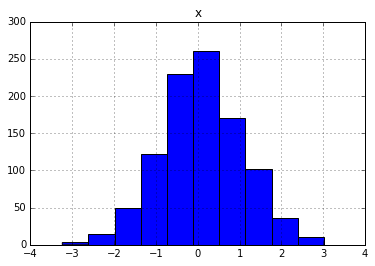

In [67]:
df0.hist(column='x');

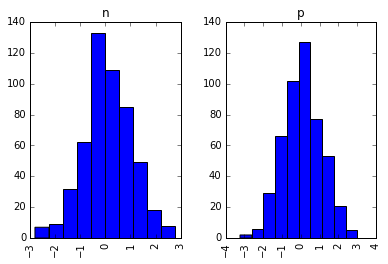

In [68]:
df0.hist(column='x',by='d',bins=10);

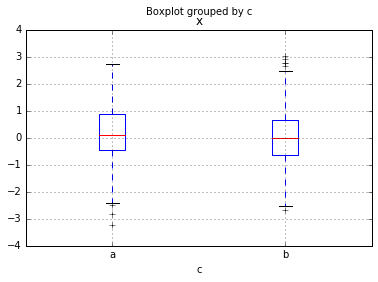

In [69]:
df0.boxplot(column='x', by='c');